<a href="https://colab.research.google.com/github/khamzovich/SQL/blob/main/bigquery_kaggle_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
from google.cloud import bigquery

# [Getting Started With SQL and BigQuery](https://www.kaggle.com/dansbecker/getting-started-with-sql-and-bigquery/tutorial)

## Introduction

Create your own project on [Google Cloud Platform console](https://console.cloud.google.com/)

In [ ]:
# Create a "Client" object
project_id = 'eg-project-333210'  # add your project id from Google Cloud Platform console
client = bigquery.Client(project=project_id)

In [ ]:
# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [ ]:
# List all the tables in the "hacker_news" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)
for table in tables:  
    print(table.table_id)

comments
full
full_201510
stories


In [ ]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("full")

# API request - fetch the table
table = client.get_table(table_ref)

In [ ]:
# Print information on all the columns in the "full" table in the "hacker_news" dataset
table.schema

[SchemaField('title', 'STRING', 'NULLABLE', 'Story title', ()),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', ()),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story or comment text', ()),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', ()),
 SchemaField('by', 'STRING', 'NULLABLE', "The username of the item's author.", ()),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', ()),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', ()),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', 'Timestamp for the unix time', ()),
 SchemaField('type', 'STRING', 'NULLABLE', 'Type of details (comment, comment_ranking, poll, story, job, pollopt)', ()),
 SchemaField('id', 'INTEGER', 'NULLABLE', "The item's unique id.", ()),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', ()),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story or poll descendants', ()),
 SchemaField('ranking', 'INTEGER', 'NULLABLE', 'Comment ranking', ()),
 SchemaField(

In [ ]:
# Preview the first five lines of the "full" table
client.list_rows(table, max_results=5).to_dataframe()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,<i>I do not know what the &quot;wet bulb&quot;...,None,dagw,None,1631703647,2021-09-15 11:00:47+00:00,comment,28537574,28533721,None,None,None
1,None,None,&gt; To reply as the devils advocate to this ...,None,johnchristopher,None,1631703707,2021-09-15 11:01:47+00:00,comment,28537577,28533015,None,None,None
2,None,None,Because it’s building a threat narrative. Anyo...,None,thatjoeoverthr,None,1631703698,2021-09-15 11:01:38+00:00,comment,28537576,28535767,None,None,None
3,None,None,I used it at a previous startup which got up t...,None,scrollaway,None,1631703622,2021-09-15 11:00:22+00:00,comment,28537571,28537159,None,None,None
4,None,None,I makes sense to me. The &quot;computer scienc...,None,progre,None,1631703620,2021-09-15 11:00:20+00:00,comment,28537570,28536905,None,None,None


In [ ]:
# Preview the first five entries in the "by" column of the "full" table
client.list_rows(table, selected_fields=table.schema[:1], max_results=5).to_dataframe()

,title
0,None
1,None
2,None
3,None
4,None


## Exercises 1

How many tables are in the `Chicago Crime` dataset?

In [ ]:
# Construct a reference to the "chicago_crime" dataset
dataset_ref = client.dataset("chicago_crime", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

### 1.1 Count tables in the dataset

In [ ]:
tables = list(client.list_tables(dataset))

for table in tables:
    print(table.table_id)

crime
snapshot-of-crime


In [ ]:
num_tables = len(tables)
num_tables

2

### 1.2 Explore the table schema

How many columns in the `crime table` have `TIMESTAMP` data?

In [ ]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("crime")

# API request - fetch the table
table = client.get_table(table_ref)

# Write the code to figure out the answer
table_schema = table.schema

print([i.field_type for i in table_schema])

['INTEGER', 'STRING', 'TIMESTAMP', 'STRING', 'STRING', 'STRING', 'STRING', 'STRING', 'BOOLEAN', 'BOOLEAN', 'INTEGER', 'INTEGER', 'INTEGER', 'INTEGER', 'STRING', 'FLOAT', 'FLOAT', 'INTEGER', 'TIMESTAMP', 'FLOAT', 'FLOAT', 'STRING']


In [ ]:
num_timestamp_fields = [i.field_type for i in table_schema].count('TIMESTAMP')
num_timestamp_fields

2

### 1.3 Create a crime map

If you wanted to create a map with a dot at the location of each crime, what are the names of the two fields you likely need to pull out of the crime table to plot the crimes on a map?

In [ ]:
for i in table_schema:
    print(i.name)

unique_key
case_number
date
block
iucr
primary_type
description
location_description
arrest
domestic
beat
district
ward
community_area
fbi_code
x_coordinate
y_coordinate
year
updated_on
latitude
longitude
location


In [ ]:
fields_for_plotting = ['latitude', 'longitude']

## Select, From & Where

#### Example: What are all the U.S. cities in the OpenAQ dataset?

In [ ]:
# Construct a reference to the "openaq" dataset
dataset_ref = client.dataset("openaq", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# List all the tables in the "openaq" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there's only one!)
for table in tables:  
    print(table.table_id)

global_air_quality


In [ ]:
# Construct a reference to the "global_air_quality" table
table_ref = dataset_ref.table("global_air_quality")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "global_air_quality" table
client.list_rows(table, max_results=5).to_dataframe()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,co,910.00,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
1,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,no2,131.87,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
2,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,o3,15.57,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
3,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,pm25,45.62,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
4,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,so2,4.49,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25


In [ ]:
# Query to select all the items from the "city" column where the "country" column is 'US'
query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

In [ ]:
# Set up the query
query_job = client.query(query)

In [ ]:
# API request - run the query, and return a pandas DataFrame
us_cities = query_job.to_dataframe()

In [ ]:
# What five cities have the most measurements?
us_cities.city.value_counts().head()

Phoenix-Mesa-Scottsdale                     88
Houston                                     82
Los Angeles-Long Beach-Santa Ana            68
New York-Northern New Jersey-Long Island    60
Riverside-San Bernardino-Ontario            60
Name: city, dtype: int64

If you want multiple columns, you can select them with a comma between the names

```
query = """
        SELECT city, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """
```

You can select all columns with a `*` like this:

```
query = """
        SELECT *
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """
```

#### Working with big datasets

In [ ]:
# Query to get the score column from every row where the type column has value "job"
query = """
        SELECT score, title
        FROM `bigquery-public-data.hacker_news.full`
        WHERE type = "job" 
        """

# Create a QueryJobConfig object to estimate size of query without running it
dry_run_config = bigquery.QueryJobConfig(dry_run=True)

# API request - dry run query to estimate costs
dry_run_query_job = client.query(query, job_config=dry_run_config)

print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))

This query will process 496972170 bytes.


You can also specify a parameter when running the query to limit how much data you are willing to scan. Here's an example with a low limit.

In [ ]:
# Only run the query if it's less than 1 GB
ONE_GB = 1000*1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
job_post_scores = safe_query_job.to_dataframe()

# Print average score for job posts
job_post_scores.score.mean()

1.7806442517797985

## Exercises 2

In [ ]:
# Construct a reference to the "openaq" dataset
dataset_ref = client.dataset("openaq", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "global_air_quality" table
table_ref = dataset_ref.table("global_air_quality")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "global_air_quality" table
client.list_rows(table, max_results=5).to_dataframe()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,co,910.00,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
1,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,no2,131.87,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
2,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,o3,15.57,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
3,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,pm25,45.62,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
4,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,so2,4.49,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25


#### 2.1 Units of measurement

Which countries have reported pollution levels in units of `ppm`? In the code cell below, set `first_query` to an SQL query that pulls the appropriate entries from the country column.

In case it's useful to see an example query, here's some code from the tutorial:

```
query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """
```

In [ ]:
# Query to select countries with units of "ppm"
first_query = """
              SELECT DISTINCT country
              FROM `bigquery-public-data.openaq.global_air_quality`
              WHERE unit = 'ppm'
              """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
first_query_job = client.query(first_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
first_results = first_query_job.to_dataframe()

# View top few rows of results
print(first_results.head())

  country
0      US
1      CL
2      AU
3      BM
4      MX


#### 2.2 High air quality

Which pollution levels were reported to be exactly 0?

* Set `zero_pollution_query` to select **all columns** of the rows where the `value` column is 0.
* Set `zero_pollution_results` to a pandas DataFrame containing the query results.

In [ ]:
# Query to select all columns where pollution levels are exactly 0
zero_pollution_query = """
                       SELECT DISTINCT *
                       FROM `bigquery-public-data.openaq.global_air_quality`
                       WHERE value = 0
                       """ # Your code goes here

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(zero_pollution_query, job_config=safe_config)

# API request - run the query and return a pandas DataFrame
zero_pollution_results = query_job.to_dataframe() # Your code goes here

print(zero_pollution_results.head())

                                        location  ... averaged_over_in_hours
0                     Victoria Memorial - WBSPCB  ...                   0.25
1  Rabindra Bharati University, Kolkata - WBSPCB  ...                   0.25
2                   Zamość ul. Hrubieszowska 69A  ...                    NaN
3                               Końskie, MOBILNA  ...                    NaN
4                               Końskie, MOBILNA  ...                    NaN

[5 rows x 11 columns]


## Group By, Having & Count

### Example: Which Hacker News comments generated the most discussion?

In [ ]:
# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "comments" table
table_ref = dataset_ref.table("comments")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "comments" table
client.list_rows(table, max_results=5).to_dataframe()

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,2701393,5l,5l,1309184881,2011-06-27 14:28:01+00:00,And the glazier who fixed all the broken windo...,2701243,None,None,0
1,5811403,99,99,1370234048,2013-06-03 04:34:08+00:00,Does canada have the equivalent of H1B/Green c...,5804452,None,None,0
2,21623,AF,AF,1178992400,2007-05-12 17:53:20+00:00,"Speaking of Rails, there are other options in ...",21611,None,None,0
3,10159727,EA,EA,1441206574,2015-09-02 15:09:34+00:00,Humans and large livestock (and maybe even pet...,10159396,None,None,0
4,2988424,Iv,Iv,1315853580,2011-09-12 18:53:00+00:00,I must say I reacted in the same way when I re...,2988179,None,None,0


In [ ]:
# Query to select comments that received more than 10 replies
query_popular = """
                SELECT parent, COUNT(id)
                FROM `bigquery-public-data.hacker_news.comments`
                GROUP BY parent
                HAVING COUNT(id) > 10
                """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_popular, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
popular_comments = query_job.to_dataframe()

# Print the first five rows of the DataFrame
popular_comments.head()         

,parent,f0_
0,6683866,39
1,6627329,46
2,3476843,49
3,7234010,48
4,2932956,76


In [ ]:
# Improved version of earlier query, now with aliasing & improved readability
query_improved = """
                 SELECT parent, COUNT(1) AS NumPosts
                 FROM `bigquery-public-data.hacker_news.comments`
                 GROUP BY parent
                 HAVING COUNT(1) > 10
                 """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
query_job = client.query(query_improved, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
improved_df = query_job.to_dataframe()

# Print the first five rows of the DataFrame
improved_df.head()

,parent,NumPosts
0,801208,56
1,5463210,55
2,6455391,67
3,8336025,50
4,3785277,85


## Exercises 3

In [ ]:
# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "comments" table
table_ref = dataset_ref.table("comments")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "comments" table
client.list_rows(table, max_results=5).to_dataframe()

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,2701393,5l,5l,1309184881,2011-06-27 14:28:01+00:00,And the glazier who fixed all the broken windo...,2701243,None,None,0
1,5811403,99,99,1370234048,2013-06-03 04:34:08+00:00,Does canada have the equivalent of H1B/Green c...,5804452,None,None,0
2,21623,AF,AF,1178992400,2007-05-12 17:53:20+00:00,"Speaking of Rails, there are other options in ...",21611,None,None,0
3,10159727,EA,EA,1441206574,2015-09-02 15:09:34+00:00,Humans and large livestock (and maybe even pet...,10159396,None,None,0
4,2988424,Iv,Iv,1315853580,2011-09-12 18:53:00+00:00,I must say I reacted in the same way when I re...,2988179,None,None,0


### Prolific commenters

Hacker News would like to send awards to everyone who has written more than 10,000 posts. Write a query that returns all authors with more than 10,000 posts as well as their post counts. Call the column with post counts NumPosts.

In case sample query is helpful, here is a query you saw in the tutorial to answer a similar question:

```
query = """
        SELECT parent, COUNT(1) AS NumPosts
        FROM `bigquery-public-data.hacker_news.comments`
        GROUP BY parent
        HAVING COUNT(1) > 10
        """
```

In [ ]:
# Query to select prolific commenters and post counts
prolific_commenters_query = """
        SELECT author, COUNT(1) AS NumPosts
        FROM `bigquery-public-data.hacker_news.comments`
        GROUP BY author
        HAVING COUNT(1) > 10000
        """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
query_job = client.query(prolific_commenters_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
prolific_commenters = query_job.to_dataframe()

# View top few rows of results
print(prolific_commenters.head())

         author  NumPosts
0           eru     10448
1       rbanffy     10557
2  dragonwriter     10723
3          None    227736
4         DanBC     12902


### Deleted comments

How many comments have been deleted? (If a comment was deleted, the `deleted` column in the comments table will have the value `True`)

In [ ]:
# Query to select prolific commenters and post counts
deleted_comments_query = """
                            SELECT COUNT(1) AS DeletedPosts
                            FROM `bigquery-public-data.hacker_news.comments`
                            WHERE deleted = True
                            """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
query_job = client.query(deleted_comments_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
deleted_comments = query_job.to_dataframe()

# View top few rows of results
print(deleted_comments.loc[0, 'DeletedPosts'])

227736


## Order By

**Dates**

Next, we'll talk about dates, because they come up very frequently in real-world databases. There are two ways that dates can be stored in BigQuery: as a `DATE` or as a `DATETIME`.

The `DATE` format has the year first, then the month, and then the day. It looks like this:

`YYYY-[M]M-[D]D`

* `YYYY`: Four-digit year
* `[M]M`: One or two digit month
* `[D]D`: One or two digit day

So 2019-01-10 is interpreted as January 10, 2019.

The `DATETIME` format is like the date format ... but with time added at the end.

### Example: Which day of the week has the most fatal motor accidents?

In [ ]:
# Construct a reference to the "nhtsa_traffic_fatalities" dataset
dataset_ref = client.dataset("nhtsa_traffic_fatalities", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "accident_2015" table
table_ref = dataset_ref.table("accident_2015")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "accident_2015" table
client.list_rows(table, max_results=5).to_dataframe()

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,county,city,day_of_crash,month_of_crash,year_of_crash,day_of_week,hour_of_crash,minute_of_crash,national_highway_system,land_use,land_use_name,functional_system,functional_system_name,ownership,ownership_name,route_signing,route_signing_name,trafficway_identifier,trafficway_identifier_2,milepoint,latitude,longitude,special_jurisdiction,special_jurisdiction_name,first_harmful_event,first_harmful_event_name,manner_of_collision,manner_of_collision_name,relation_to_junction_within_interchange_area,relation_to_junction_specific_location,relation_to_junction_specific_location_name,type_of_intersection,work_zone,relation_to_trafficway,relation_to_trafficway_name,light_condition,light_condition_name,atmospheric_conditions_1,atmospheric_conditions_1_name,atmospheric_conditions_2,atmospheric_conditions_2_name,atmospheric_conditions,atmospheric_conditions_name,school_bus_related,rail_grade_crossing_identifier,hour_of_notification,minute_of_notification,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,19,Iowa,190204,1,1,0,0,0,1,1,109,0,11,9,2015,6,20,20,0,1,Rural,7,Local,2,County Highway Agency,4,County Road,CR-510TH ST,,0,43.499950,-94.035428,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,1,Daylight,1,Clear,0,No Additional Atmospheric Conditions,1,Clear,No,0000000,20,28,20,30,21,2,0,None,0,None,0,None,1,1,2015-09-11 20:20:00+00:00
1,19,Iowa,190233,1,1,0,0,0,1,1,181,0,1,11,2015,1,0,30,1,1,Rural,3,Principal Arterial – Other,1,State Highway Agency,2,U.S. Highway,US-65,,245,41.470728,-93.558444,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,2,Dark – Not Lighted,1,Clear,0,No Additional Atmospheric Conditions,1,Clear,No,0000000,88,88,88,88,88,88,0,None,0,None,0,None,1,1,2015-11-01 00:30:00+00:00
2,19,Iowa,190179,1,1,0,0,0,2,2,193,0,4,5,2015,2,16,18,0,1,Rural,5,Major Collector,2,County Highway Agency,4,County Road,CR-K42 DALLAS AVE,CR-300TH ST,0,42.272072,-96.232194,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,3,Intersection Related,Four-Way Intersection,None,4,On Roadside,1,Daylight,2,Rain,0,No Additional Atmospheric Conditions,2,Rain,No,0000000,16,27,16,34,17,1,0,None,0,None,0,None,1,0,2015-05-04 16:18:00+00:00
3,19,Iowa,190248,1,1,0,0,0,4,4,99,0,17,11,2015,3,12,26,1,1,Rural,1,Interstate,1,State Highway Agency,1,Interstate,I-80,,188,41.681933,-92.983681,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,1,Daylight,10,Cloudy,2,Rain,2,Rain,No,0000000,12,25,12,34,99,99,0,None,0,None,0,None,2,0,2015-11-17 12:26:00+00:00
4,19,Iowa,190231,1,1,0,0,0,1,1,121,0,31,10,2015,7,4,49,0,1,Rural,7,Local,2,County Highway Agency,4,County Road,CR-290TH ST,,0,41.228814,-93.970375,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,2,Dark – Not Lighted,2,Rain,0,N

In [ ]:
# Query to find out the number of accidents for each day of the week
query = """
        SELECT COUNT(consecutive_number) AS num_accidents, 
               EXTRACT(DAYOFWEEK FROM timestamp_of_crash) AS day_of_week
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
        GROUP BY day_of_week
        ORDER BY num_accidents DESC
        """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
accidents_by_day = query_job.to_dataframe()

# Print the DataFrame
accidents_by_day

,num_accidents,day_of_week
0,5659,7
1,5298,1
2,4916,6
3,4460,5
4,4182,4
5,4038,2
6,3985,3


## Exercises 4

In [ ]:
# Construct a reference to the "world_bank_intl_education" dataset
dataset_ref = client.dataset("world_bank_intl_education", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "international_education" table
table_ref = dataset_ref.table("international_education")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "international_education" table
client.list_rows(table, max_results=5).to_dataframe()

,country_name,country_code,indicator_name,indicator_code,value,year
0,Turks and Caicos Islands,TCA,Theoretical duration of pre-primary education ...,UIS.THDUR.0,2.0,2016
1,St. Vincent and the Grenadines,VCT,Population of the official age for upper secon...,SP.SEC.UTOT.FE.IN,1913.0,2016
2,Suriname,SUR,Population of the official entrance age to sec...,UIS.SAP.23.GPV.G1,9727.0,2016
3,Tajikistan,TJK,Percentage of female graduates from tertiary e...,SE.TER.GRAD.OT.FE.ZS,0.0,2016
4,Libya,LBY,Population of the official age for post-second...,UIS.SAP.4,297115.0,2016


### 4.1 Government expenditure on education

Which countries spend the largest fraction of GDP on education?

In [ ]:
# Your code goes here
country_spend_pct_query = """
                          SELECT country_name, AVG(value) as avg_ed_spending_pct
                          FROM `bigquery-public-data.world_bank_intl_education.international_education`
                          WHERE indicator_code = 'SE.XPD.TOTL.GD.ZS' AND year >=2010 AND year <= 2017
                          GROUP BY country_name
                          ORDER BY avg_ed_spending_pct DESC
                          """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
country_spend_pct_query_job = client.query(country_spend_pct_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
country_spending_results = country_spend_pct_query_job.to_dataframe()

# View top few rows of results
print(country_spending_results.head())

            country_name  avg_ed_spending_pct
0                   Cuba            12.837270
1  Micronesia, Fed. Sts.            12.467750
2        Solomon Islands            10.001080
3                Moldova             8.372153
4                Namibia             8.349610


### 4.2 Identify interesting codes to explore

The last question started by telling you to focus on rows with the code `SE.XPD.TOTL.GD.ZS`. But how would you find more interesting indicator codes to explore?

There are 1000s of codes in the dataset, so it would be time consuming to review them all. But many codes are available for only a few countries. When browsing the options for different codes, you might restrict yourself to codes that are reported by many countries.

Write a query below that selects the indicator code and indicator name for all codes with at least 175 rows in the year 2016.

Requirements:

* You should have one row for each indicator code.
* The columns in your results should be called indicator_code, indicator_name, and num_rows.
* Only select codes with 175 or more rows in the raw database (exactly 175 rows would be included).
* To get both the indicator_code and indicator_name in your resulting DataFrame, you need to include both in your SELECT statement (in addition to a COUNT() aggregation). This requires you to include both in your GROUP BY clause.
* Order from results most frequent to least frequent.

In [ ]:
# Your code goes here
country_spend_pct_query = """
                          SELECT indicator_code, indicator_name, COUNT(1) AS num_rows
                          FROM `bigquery-public-data.world_bank_intl_education.international_education`
                          WHERE year = 2016
                          GROUP BY indicator_code, indicator_name
                          HAVING COUNT(1) >= 175
                          ORDER BY num_rows DESC
                          """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
country_spend_pct_query_job = client.query(country_spend_pct_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
country_spending_results = country_spend_pct_query_job.to_dataframe()

# View top few rows of results
print(country_spending_results.head())

      indicator_code                       indicator_name  num_rows
0        SP.POP.TOTL                    Population, total       232
1        SP.POP.GROW         Population growth (annual %)       232
2     IT.NET.USER.P2      Internet users (per 100 people)       223
3        SH.DYN.MORT  Mortality rate, under-5 (per 1,000)       213
4  SP.POP.TOTL.FE.ZS      Population, female (% of total)       213


## As & With

### Example: How many Bitcoin transactions are made per month?

In [ ]:
# Construct a reference to the "crypto_bitcoin" dataset
dataset_ref = client.dataset("crypto_bitcoin", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "transactions" table
table_ref = dataset_ref.table("transactions")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "transactions" table
client.list_rows(table, max_results=5).to_dataframe()

,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,f5d9499fb93c104c30f2f0a6055787c4e788b0fec8be89...,512,512,1,0,000000000000000160f3b852402569f6a1f1b38cd1a35a...,273029,2013-12-04 13:32:16+00:00,2013-12-01,2,6,978848094,978798000,False,50094,"[{'index': 0, 'spent_transaction_hash': '0608f...","[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
1,de43728cb2982ab848938d061f55d522e15fe79bb5c3ab...,512,512,1,0,00000000000000003a1260f6a07fa8a9f66bbc89972641...,273014,2013-12-04 11:08:18+00:00,2013-12-01,2,6,633984346,633934346,False,50000,"[{'index': 0, 'spent_transaction_hash': '10e0e...","[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
2,b9aaa4ab930570f8af4eda306637b9a96b6a5a8bba0b15...,768,768,1,0,0000000000000003696f88dc5eb21e54f25d94938ad562...,277416,2013-12-28 14:48:01+00:00,2013-12-01,4,1,170617369,170607369,False,10000,"[{'index': 0, 'spent_transaction_hash': '91ded...","[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
3,71863169438b978b5cc812261781a333a2a20b03509601...,768,768,1,0,000000000000000356bdf67fc717f56f065935ec29edd0...,272883,2013-12-03 18:47:25+00:00,2013-12-01,4,2,76686838,76586838,False,100000,"[{'index': 0, 'spent_transaction_hash': 'f9b6b...","[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
4,eef7f497635bd52bf89393aff898bef8a93dce7058c9ee...,768,768,1,0,000000000000000574f53b20f90356afb560c8e68587f7...,272702,2013-12-02 19:11:15+00:00,2013-12-01,4,4,65856646,65816646,False,40000,"[{'index': 0, 'spent_transaction_hash': '54f5d...","[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."


In [ ]:
# Query to select the number of transactions per date, sorted by date
query_with_CTE = """ 
                 WITH time AS 
                 (
                     SELECT DATE(block_timestamp) AS trans_date
                     FROM `bigquery-public-data.crypto_bitcoin.transactions`
                 )
                 SELECT COUNT(1) AS transactions,
                        trans_date
                 FROM time
                 GROUP BY trans_date
                 ORDER BY trans_date
                 """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_with_CTE, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
transactions_by_date = query_job.to_dataframe()

# Print the first five rows
transactions_by_date.head()

,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


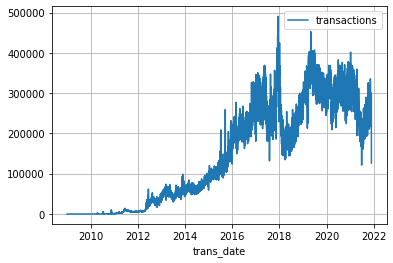

In [ ]:
transactions_by_date.set_index('trans_date').plot(grid=True)

As you can see, common table expressions (CTEs) let you shift a lot of your data cleaning into SQL. That's an especially good thing in the case of BigQuery, because it is vastly faster than doing the work in Pandas.

## Exercises 5

In [ ]:
# Construct a reference to the "chicago_taxi_trips" dataset
dataset_ref = client.dataset("chicago_taxi_trips", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

### 5.1 Find the data

In [ ]:
tables = list(client.list_tables(dataset))

for table in tables:
    print(table.table_id)

taxi_trips


In [ ]:
# due to there is only one table
table_name = tables[0].table_id
table_name

'taxi_trips'

### 5.2 Peek at the data

Use the next code cell to peek at the top few rows of the data. Inspect the data and see if any issues with data quality are immediately obvious.

In [ ]:
# Construct a reference to the "transactions" table
table_ref = dataset_ref.table(table_name)

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "transactions" table
client.list_rows(table, max_results=5).to_dataframe()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,e5ab129c155c3719216beb5dcbf2aa8ca19e5656,c1aac0b2efe1a131a40f9761b4f5c9dcad9168b29cac42...,2014-07-30 23:00:00+00:00,2014-07-30 23:00:00+00:00,0,0.0,None,None,None,None,8.85,1.77,0.0,0.0,10.62,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
1,a5857e21a97c70612af9b1045b8bd7a626c558ef,c6e0071dc1db129271f6d4833953bb62bd466a9aed3330...,2014-07-30 09:30:00+00:00,2014-07-30 09:30:00+00:00,0,0.0,None,None,None,None,12.25,0.00,0.0,0.0,12.25,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
2,2f5f796136c7e11e48d3bb08c8c6d73dfbe0e88c,54044c4ce47d539663e1520272de87e38a14d38ca23a66...,2014-07-13 07:00:00+00:00,2014-07-13 07:00:00+00:00,0,0.0,None,None,None,None,34.25,6.85,0.0,0.0,41.10,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
3,03cf9fabe105982c7b0382c54e002e43dd739c3a,2ee325e10e1eec919fc5bfc4d64ed9951cbab4fb13b3e2...,2014-07-07 23:00:00+00:00,2014-07-07 23:00:00+00:00,0,0.0,None,None,None,None,4.45,1.11,0.0,0.0,5.56,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
4,1ba3648418a92ae0743abf80ca631cca51446d5b,16a233f62883c48f7462a0d5b87191190c49a46fe52f37...,2014-08-28 16:45:00+00:00,2014-08-28 16:45:00+00:00,0,0.0,None,None,None,None,6.85,0.00,0.0,0.0,6.85,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None


In [ ]:
client.list_rows(table, max_results=5).to_dataframe().columns

Index(['unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'pickup_census_tract',
       'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'pickup_latitude',
       'pickup_longitude', 'pickup_location', 'dropoff_latitude',
       'dropoff_longitude', 'dropoff_location'],
      dtype='object')

### 5.3 Determine when this data is from

If the data is sufficiently old, we might be careful before assuming the data is still relevant to traffic patterns today. Write a query that counts the number of trips in each year.

Your results should have two columns:

* `year` - the year of the trips
* `num_trips` - the number of trips in that year

In [ ]:
# Your code goes here
# 1st way
rides_per_year_query = """
                      WITH time AS 
                      (
                          SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year
                          FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                      )
                      SELECT year,
                             COUNT(1) AS num_trips
                      FROM time
                      GROUP BY year
                      ORDER BY year
                      """
# 2nd way
#rides_per_year_query = """
#                       SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year,
#                              COUNT(1) AS num_trips
#                       FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
#                       GROUP BY year
#                       ORDER BY year
#                       """

# Set up the query (cancel the query if it would use too much of 
# your quota)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
rides_per_year_query_job = client.query(rides_per_year_query, job_config=safe_config) # Your code goes here

# API request - run the query, and return a pandas DataFrame
rides_per_year_result = rides_per_year_query_job.to_dataframe()

# View results
print(rides_per_year_result)

   year  num_trips
0  2013   27217716
1  2014   37395436
2  2015   32385875
3  2016   31759339
4  2017   24988003
5  2018   20732088
6  2019   16477365
7  2020    3889032
8  2021    3072477


### 5.4 Dive slightly deeper

You'd like to take a closer look at rides from 2017. Copy the query you used above in `rides_per_year_query` into the cell below for `rides_per_month_query`. Then modify it in two ways:

* Use a WHERE clause to limit the query to data from 2017.
* Modify the query to extract the month rather than the year.

In [ ]:
# Your code goes here
rides_per_month_query = """
                      WITH time AS 
                      (
                          SELECT EXTRACT(MONTH FROM trip_start_timestamp) AS month
                          FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                          WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2017
                      )
                      SELECT month,
                             COUNT(1) AS num_trips
                      FROM time
                      GROUP BY month
                      ORDER BY month
                      """

# Set up the query (cancel the query if it would use too much of 
# your quota)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
rides_per_month_query_job = client.query(rides_per_month_query, job_config=safe_config) # Your code goes here

# API request - run the query, and return a pandas DataFrame
rides_per_month_result = rides_per_month_query_job.to_dataframe()

# View results
print(rides_per_month_result)

    month  num_trips
0       1    1972071
1       2    1909802
2       3    2362105
3       4    2194702
4       5    2323386
5       6    2324472
6       7    2054299
7       8    2079861
8       9    1950631
9      10    2141197
10     11    1907997
11     12    1767480


### 5.5 Write the query

It's time to step up the sophistication of your queries. Write a query that shows, for each hour of the day in the dataset, the corresponding number of trips and average speed.

Your results should have three columns:

* `hour_of_day` - sort by this column, which holds the result of extracting the hour from `trip_start_timestamp`.
* `num_trips` - the count of the total number of trips in each hour of the day (e.g. how many trips were started between 6AM and 7AM, independent of which day it occurred on).
* `avg_mph` - the average speed, measured in miles per hour, for trips that started in that hour of the day. Average speed in miles per hour is calculated as `3600 * SUM(trip_miles) / SUM(trip_seconds)`. (The value 3600 is used to convert from seconds to hours.)

Restrict your query to data meeting the following criteria:

* a trip_start_timestamp between `2017-01-01` and `2017-07-01`
* `trip_seconds > 0` and `trip_miles > 0`

You will use a common table expression (CTE) to select just the relevant rides. Because this dataset is very big, this CTE should select only the columns you'll need to create the final output (though you won't actually create those in the CTE -- instead you'll create those in the later `SELECT` statement below the CTE).

This is a much harder query than anything you've written so far. Good luck!

In [ ]:
# Your code goes here
speeds_query = """
               WITH RelevantRides AS
               (
                   SELECT EXTRACT(HOUR FROM trip_start_timestamp) AS hour_of_day,
                          trip_seconds,
                          trip_miles
                   FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                   WHERE trip_start_timestamp > '2017-01-01' AND
                         trip_start_timestamp < '2017-07-01' AND
                         trip_seconds > 0 AND
                         trip_miles > 0
               )
               SELECT hour_of_day,
                      COUNT(1) AS num_trips,
                      3600 * SUM(trip_miles) / SUM(trip_seconds) as avg_mph
               FROM RelevantRides
               GROUP BY hour_of_day
               ORDER BY hour_of_day
               """

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
speeds_query_job = client.query(speeds_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
speeds_result = speeds_query_job.to_dataframe() # Your code here

# View results
print(speeds_result)

    hour_of_day  num_trips    avg_mph
0             0     319339  20.230524
1             1     266529  18.937621
2             2     210147  18.777070
3             3     159668  20.158048
4             4     122183  26.736014
5             5     119312  30.769172
6             6     182738  24.588313
7             7     358406  17.735967
8             8     541775  15.079892
9             9     565548  16.543882
10           10     525120  18.539614
11           11     594603  18.928379
12           12     622324  17.838745
13           13     630181  17.671089
14           14     622465  16.974239
15           15     640430  15.688418
16           16     701435  14.283888
17           17     756627  12.462955
18           18     768251  13.646810
19           19     701064  16.642882
20           20     598614  19.536777
21           21     552726  20.433874
22           22     501095  19.531374
23           23     399587  19.877046


## Joining Data

### Example: How many files are covered by each type of software license?

We'll work with two tables in the database. The first table is the `licenses` table, which provides the name of each GitHub repo (in the `repo_name` column) and its corresponding license. Here's a view of the first five rows.

In [ ]:
# Construct a reference to the "github_repos" dataset
dataset_ref = client.dataset("github_repos", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "licenses" table
licenses_ref = dataset_ref.table("licenses")

# API request - fetch the table
licenses_table = client.get_table(licenses_ref)

# Preview the first five lines of the "licenses" table
client.list_rows(licenses_table, max_results=5).to_dataframe()

,repo_name,license
0,zoffixznet/perl6-App-Nopaste,artistic-2.0
1,vikt0rs/devstack-plugin-zmq,artistic-2.0
2,LegitTalon/nicolas,artistic-2.0
3,Arabidopsis-Information-Portal/Intern-Hello-World,artistic-2.0
4,andrewdonkin/falcon,artistic-2.0


The second table is the `sample_files` table, which provides, among other information, the GitHub repo that each file belongs to (in the `repo_name` column). The first several rows of this table are printed below.

In [ ]:
# Construct a reference to the "sample_files" table
files_ref = dataset_ref.table("sample_files")

# API request - fetch the table
files_table = client.get_table(files_ref)

# Preview the first five lines of the "sample_files" table
client.list_rows(files_table, max_results=5).to_dataframe()

,repo_name,ref,path,mode,id,symlink_target
0,git/git,refs/heads/master,RelNotes,40960,62615ffa4e97803da96aefbc798ab50f949a8db7,Documentation/RelNotes/2.10.0.txt
1,np/ling,refs/heads/master,tests/success/plug_compose.t/plug_compose.ll,40960,0c1605e4b447158085656487dc477f7670c4bac1,../../../fixtures/all/plug_compose.ll
2,np/ling,refs/heads/master,fixtures/strict-par-success/parallel_assoc_lef...,40960,b59bff84ec03d12fabd3b51a27ed7e39a180097e,../all/parallel_assoc_left.ll
3,np/ling,refs/heads/master,fixtures/sequence/parallel_assoc_2tensor2_left.ll,40960,f29523e3fb65702d99478e429eac6f801f32152b,../all/parallel_assoc_2tensor2_left.ll
4,np/ling,refs/heads/master,fixtures/success/my_dual.ll,40960,38a3af095088f90dfc956cb990e893909c3ab286,../all/my_dual.ll


Next, we write a query that uses information in both tables to determine how many files are released in each license.

In [ ]:
# Query to determine the number of files per license, sorted by number of files
query = """
        SELECT L.license, COUNT(1) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` AS sf
        INNER JOIN `bigquery-public-data.github_repos.licenses` AS L 
            ON sf.repo_name = L.repo_name
        GROUP BY L.license
        ORDER BY number_of_files DESC
        """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
file_count_by_license = query_job.to_dataframe()

file_count_by_license.head()

,license,number_of_files
0,mit,20418035
1,gpl-2.0,16792944
2,apache-2.0,7106098
3,gpl-3.0,4902118
4,bsd-3-clause,2929339


## Exercises 6

**Stack Overflow** is a widely beloved question and answer site for technical questions. You'll probably use it yourself as you keep using SQL (or any programming language).

In [ ]:
# Construct a reference to the "stackoverflow" dataset
dataset_ref = client.dataset("stackoverflow", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

### 6.1 Explore the data

Before writing queries or `JOIN` clauses, you'll want to see what tables are available.

In [ ]:
# Get a list of available tables
tables = list(client.list_tables(dataset))
list_of_tables = [table.table_id for table in tables] # Your code here

# Print your answer
print(*list_of_tables, sep='\n')

badges
comments
post_history
post_links
posts_answers
posts_moderator_nomination
posts_orphaned_tag_wiki
posts_privilege_wiki
posts_questions
posts_tag_wiki
posts_tag_wiki_excerpt
posts_wiki_placeholder
stackoverflow_posts
tags
users
votes


### 6.2 Review relevant tables

If you are interested in people who answer questions on a given topic, the `posts_answers` table is a natural place to look. Run the following cell, and look at the output.

In [ ]:
# Construct a reference to the "posts_answers" table
answers_table_ref = dataset_ref.table("posts_answers")

# API request - fetch the table
answers_table = client.get_table(answers_table_ref)

# Preview the first five lines of the "posts_answers" table
client.list_rows(answers_table, max_results=5).to_dataframe()

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,68472973,None,<p>Thank you. After thinking through your ans...,None,None,0,None,2021-07-21 16:09:49.560000+00:00,None,2021-07-21 16:09:49.560000+00:00,None,None,None,None,11880888,68461807,2,0,None,None
1,68472974,None,<pre><code>SELECT age((((m.message -&gt; 'head...,None,None,0,None,2021-07-21 16:09:54.130000+00:00,None,2021-07-21 16:09:54.130000+00:00,None,None,None,None,14132876,68471992,2,0,None,None
2,68472975,None,<p>I believe <code>Identifiable</code> is a pr...,None,None,1,None,2021-07-21 16:09:56.317000+00:00,None,2021-07-21 16:09:56.317000+00:00,None,None,None,None,16487083,68472232,2,0,None,None
3,68472976,None,<p>Funny enough I had the same problem with th...,None,None,0,None,2021-07-21 16:10:06.223000+00:00,None,2021-07-21 16:10:06.223000+00:00,None,None,None,None,9497800,64728953,2,0,None,None
4,68472989,None,<p>You either need to set a <code>height</code...,None,None,0,None,2021-07-21 16:10:45.250000+00:00,None,2021-07-21 16:10:45.250000+00:00,None,None,None,None,6035993,68472903,2,0,None,None


It isn't clear yet how to find users who answered questions on any given topic. But `posts_answers` has a `parent_id` column. If you are familiar with the Stack Overflow site, you might figure out that the `parent_id` is the question each post is answering.

Look at `posts_questions` using the cell below.

In [ ]:
# Construct a reference to the "posts_questions" table
questions_table_ref = dataset_ref.table("posts_questions")

# API request - fetch the table
questions_table = client.get_table(questions_table_ref)

# Preview the first five lines of the "posts_questions" table
client.list_rows(questions_table, max_results=5).to_dataframe()

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,68760184,SpawnPrefabAtGeoLocation with mapbox-streets-v8?,<p>How can we spawn custom prefabs at geo loca...,None,0,0,None,2021-08-12 15:22:56.787000+00:00,None,2021-08-12 15:22:56.787000+00:00,None,None,None,None,8169506,None,1,0,mapbox-unity,2
1,68776566,Why to use process.nextTick() to call Writeabl...,"<p>I was reading the <a href=""https://nodejs.o...",None,0,0,None,2021-08-13 17:56:46.653000+00:00,None,2021-08-13 17:56:46.653000+00:00,None,None,None,None,11255630,None,1,0,javascript|node.js|stream|buffer,2
2,68847727,Share button in browser copy old address url,<p>I dont know but my share button in browser ...,None,0,0,None,2021-08-19 12:16:22.210000+00:00,None,2021-08-19 12:16:22.210000+00:00,None,None,None,None,15916653,None,1,0,url|mobile,2
3,68863312,Changed a Virtual Switch on a node and destroy...,<p>I have a Windows Failover cluster with 2 'b...,None,0,0,None,2021-08-20 13:46:29.450000+00:00,None,2021-08-20 13:46:29.450000+00:00,None,None,None,None,3533172,None,1,0,failovercluster,2
4,69023598,Problem about exporting data by the function “...,<p>1.The field type defined in the database is...,None,0,0,None,2021-09-02 03:00:15+00:00,None,2021-09-02 03:00:15+00:00,None,None,None,None,15504166,None,1,0,dolphindb,2


Solution: `posts_questions` has a column called `tags` which lists the topics/technologies each question is about.

`posts_answers` has a column called `parent_id` which identifies the ID of the question each answer is responding to. `posts_answers` also has an `owner_user_id` column which specifies the ID of the user who answered the question.

You can join these two tables to:

* determine the tags for each answer, and then
* select the owner_user_id of the answers on the desired tag.

This is exactly what you will do over the next few questions.

### 6.3 Selecting the right questions

Write a query that selects the `id`, `title` and `owner_user_id` columns from the `posts_questions` table.

* Restrict the results to rows that contain the word "bigquery" in the `tags` column.
* Include rows where there is other text in addition to the word "bigquery" (e.g., if a row has a tag "bigquery-sql", your results should include that too).

In [ ]:
# Your code here
questions_query = """
                  SELECT id, title, owner_user_id
                  FROM `bigquery-public-data.stackoverflow.posts_questions`
                  WHERE tags LIKE '%bigquery%'
                  """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
questions_query_job = client.query(questions_query, job_config=safe_config) # Your code goes here

# API request - run the query, and return a pandas DataFrame
questions_results = questions_query_job.to_dataframe() # Your code goes here

# Preview results
print(questions_results.head())

         id                                              title  owner_user_id
0  37096531  BigQuery return all matches of regular expression      1166285.0
1  36862928                    Second maximum value using OVER      4043227.0
2  36895102      Why does count(*) return an unsigned integer?       976883.0
3  37053212               Issue with Table_Date_Range function      5816308.0
4  36757832        Having trouble joining properly in bigquery      6233008.0


### 6.4 Your first join

Now that you have a query to select questions on any given topic (in this case, you chose "bigquery"), you can find the answers to those questions with a **JOIN**.

Write a query that returns the `id`, `body` and `owner_user_id` columns from the `posts_answers` table for answers to "bigquery"-related questions.

* You should have one row in your results for each answer to a question that has "bigquery" in the `tags`.
* Remember you can get the tags for a question from the `tags` column in the `posts_questions table`.

Here's a reminder of what a **JOIN** looked like in the tutorial:

```
query = """
        SELECT p.Name AS Pet_Name, o.Name AS Owner_Name
        FROM `bigquery-public-data.pet_records.pets` as p
        INNER JOIN `bigquery-public-data.pet_records.owners` as o 
            ON p.ID = o.Pet_ID
        """
```

It may be useful to scroll up and review the first several rows of the `posts_answers` and `posts_questions` tables.

In [ ]:
# Your code here
answers_query = """
                SELECT a.id, a.body, a.owner_user_id
                FROM `bigquery-public-data.stackoverflow.posts_questions` q
                    INNER JOIN `bigquery-public-data.stackoverflow.posts_answers` a
                        ON q.id = a.parent_id
                WHERE q.tags LIKE '%bigquery%'
                """

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=27*10**10)
answers_query_job = client.query(answers_query, job_config=safe_config) # Your code goes here

# API request - run the query, and return a pandas DataFrame
answers_results = answers_query_job.to_dataframe() # Your code goes here

# Preview results
print(answers_results.head())

         id                                               body  owner_user_id
0  55329635  <p>ok - the trick as to my original question h...       655489.0
1  55352576  <p>The date field in the BigQuery schema shoul...      4465586.0
2  55354026  <p>Here is my solution. I converted JSON strin...      1872639.0
3  55396840  <p>Have you considered Cloud BQ partitions? </...      2790312.0
4  55401492  <p>Could you not simply play with the executio...      5622249.0


### 6.5 Answer the question

You have the merge you need. But you want a list of users who have answered many questions... which requires more work beyond your previous result.

Write a new query that has a single row for each user who answered at least one question with a tag that includes the string "bigquery". Your results should have two columns:

* `user_id` - contains the `owner_user_id` column from the `posts_answers` table
* `number_of_answers` - contains the number of answers the user has written to "bigquery"-related questions

In [ ]:
# Your code here
bigquery_experts_query = """
                         SELECT a.owner_user_id AS user_id,
                                COUNT(1) AS number_of_answers
                         FROM `bigquery-public-data.stackoverflow.posts_questions` q
                             INNER JOIN `bigquery-public-data.stackoverflow.posts_answers` a
                                 ON q.id = a.parent_id
                         WHERE q.tags LIKE '%bigquery%'
                         GROUP BY a.owner_user_id
                         """

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
bigquery_experts_query_job = client.query(bigquery_experts_query, job_config=safe_config) # Your code goes here

# API request - run the query, and return a pandas DataFrame
bigquery_experts_results = bigquery_experts_query_job.to_dataframe() # Your code goes here

# Preview results
print(bigquery_experts_results.head())

     user_id  number_of_answers
0   610620.0                 14
1  8692374.0                  1
2   132438.0                899
3  2649611.0                  1
4  3693889.0                  2


### 6.6 Building a more generally useful service

How could you convert what you've done to a general function a website could call on the backend to get experts on any topic?

In [ ]:
def expert_finder(topic, client):
    '''
    Returns a DataFrame with the user IDs who have written Stack Overflow answers on a topic.

    Inputs:
        topic: A string with the topic of interest
        client: A Client object that specifies the connection to the Stack Overflow dataset

    Outputs:
        results: A DataFrame with columns for user_id and number_of_answers. Follows similar logic to bigquery_experts_results shown above.
    '''
    my_query = """
               SELECT a.owner_user_id AS user_id, COUNT(1) AS number_of_answers
               FROM `bigquery-public-data.stackoverflow.posts_questions` AS q
               INNER JOIN `bigquery-public-data.stackoverflow.posts_answers` AS a
                   ON q.id = a.parent_Id
               WHERE q.tags like '%{topic}%'
               GROUP BY a.owner_user_id
               """

    # Set up the query (a real service would have good error handling for 
    # queries that scan too much data)
    safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)      
    my_query_job = client.query(my_query, job_config=safe_config)

    # API request - run the query, and return a pandas DataFrame
    results = my_query_job.to_dataframe()

    return results